### Calcolo funzioni di autocorrelazione mediando su tutto il database (separatamente per ogni rho) più calcolo std

$$ 
acf(k) = \sum_{n=0}^{N-k-1} \frac{(a(n)-\bar{a})\,\,\, (a(n+k)-\bar{a})}{N-k}
$$

a(n) per n da 0 a N-1 e acf(k) per k da 0 a N-1. Poi ognuna la normalizzo rispetto al suo primo valore, in modo che partano sempre da 1.

In [45]:
import numpy as np
    
def acf(x):
    result = np.correlate(x, x, mode='full')
    
    for i in range(len(result)):
        result[i] = result[i] / (len(result)-i) # normalizzazione in base al numero di punti sommati
    return  result[result.size // 2:] / result[result.size // 2]

def compute_acfs(paths):
    aaacf = np.ndarray(shape=(2,3,2000))
    for path in paths:
        r = float(path[-8:-4])
        print(f'computing acf for r={r}', end=' ')
        db = np.load(path)
        sig_len = len(db[0,0,:])
        n_traj = len(db[:,0,0])
        aacf = np.ndarray(shape=(n_traj,1,sig_len))
        aacf[:,:,:] = 0.0
        for traj, ii in zip(db, range(n_traj)):
            a = traj[0,:]
            #b = traj[1,:]
            #c = traj[2,:]
            a -= np.mean(a)
            #b -= np.mean(b)
            #c -= np.mean(c)
            aacf[ii,0,:] = acf(a)
            #aacf[ii,1,:] = acf(b)
            #aacf[ii,2,:] = acf(c)
        
        aaacf[:,:,:] = 0.0
        aaacf[0,:,:] = np.mean(aacf, axis=0)
        aaacf[1,:,:] = np.std(aacf, axis=0)   
        np.save(f'/scratch/scarpolini/databases/acfe2_lorenz_{r:.1f}', aaacf)
        print('Saved!')

def load_acf(r):
    path = f'/scratch/scarpolini/databases/acfe2_lorenz_{r:.1f}.npy'
    acf = np.load(path)
    return acf

def load_random_traj(r):
    n = round(np.random.uniform(50000))
    path = f'/scratch/scarpolini/databases/db_lorenz_{r:.1f}.npy'
    trajx = np.load(path)[n,0,:]
    return trajx

import glob
paths = glob.glob('/scratch/scarpolini/databases/db_lorenz_*.npy')
paths = sorted(paths, key=lambda x : float(x[-8:-4]))
path = paths[3:]
#compute_acfs(path)

In [11]:
acf(np.array([1.]*10))
    
def acf(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size // 2:] / result[result.size // 2:].max()

acf(np.array([1.]*10))

array([1. , 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1])

### plotto risultati acf e std per una rho

In [ ]:
def plot_acfs(rv, xlim):
    import matplotlib.pyplot as plt
    for r in rv:
        mm = load_acf(r)[0,0,:]
        ss = load_acf(r)[1,0,:]
        l, caps, c = plt.errorbar(range(xlim),mm[:xlim],yerr=ss[:xlim], lw=0, marker='o', ms=6,
                                  elinewidth=1, uplims=True, lolims=True, capsize=5, label=str(r))
        for cap in caps:
            cap.set_marker("_")
        plt.xlabel("t")
        plt.ylabel("acf")
    plt.title('auto corr func')
    plt.legend()
    plt.show()

plot_acfs([10, 46],30)

/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


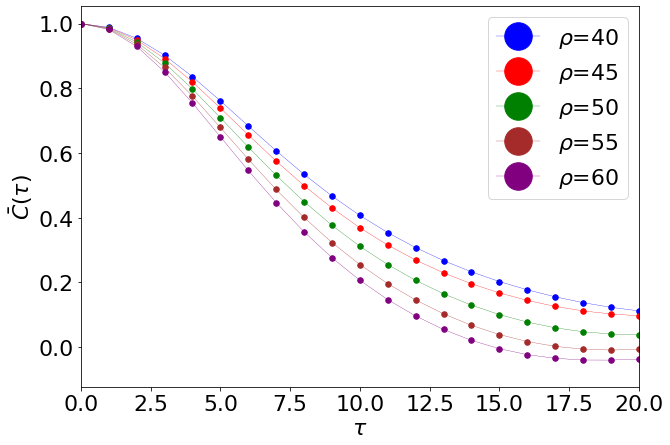

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update({'font.size': 22})
plt.figure(figsize=(10,7))

xlim = 10
rv = [40,45,50,55,60]
colors = ['blue', 'red', 'green', 'brown', 'purple']
### mediati
for i, r in enumerate(rv) :
    pathh = f'/scratch/scarpolini/databases/acfe_lorenz_{r:.1f}.npy'
    aacf = load_acf(r)[0,0,:]
    plt.plot(np.arange(0,2000),aacf,color=colors[i], label='$\\rho$='+str(r), lw=0.3, marker='.', ms=11)

# ### traiettorie singole
# for i, r in enumerate(rv) :
#     trajx = load_random_traj(r)
#     acfx = acf(trajx)
#     plt.plot(range(xlim),acfx[:xlim], label='singola r='+str(r), c=colors[i])
        
plt.xlabel("$\\tau$")
plt.ylabel("$\\bar{C}(\\tau)$")
plt.legend(markerscale=5)
plt.xlim([0,20])
plt.savefig(f'plots/acf_comparation.png', dpi=100, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None,
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None, metadata=None)
plt.show()

### Exit time $\bar{t}_s$
$$
\bar t _s := \bar t \quad t.c. \quad acf(\bar t) = s
$$

In [ ]:
from acf_utils import *

import glob
paths = glob.glob('/scratch/scarpolini/databases/db_lorenz_*.npy')
paths = sorted(paths, key=lambda x : float(x[-8:-4]))
path = paths
exit_time(path,0.5)

computing exit time for r=10.0, 49999 Saved!
computing exit time for r=11.0, 49999 Saved!
computing exit time for r=12.0, 49999 Saved!
computing exit time for r=13.0, 49999 Saved!
computing exit time for r=14.0, 49999 Saved!
computing exit time for r=15.0, 49999 Saved!
computing exit time for r=16.0, 49999 Saved!
computing exit time for r=17.0, 49999 Saved!
computing exit time for r=18.0, 49999 Saved!
computing exit time for r=19.0, 49999 Saved!
computing exit time for r=20.0, 49999 Saved!
computing exit time for r=21.0, 49999 Saved!
computing exit time for r=22.0, 49999 Saved!
computing exit time for r=22.5, 49999 Saved!


In [2]:
path = ['../lorenz_wgangp2/runs/1/gen_trajs.npy']
gen_exit_time(path,0.5)


computing exit time for r=54, 49999 Saved!


### faccio il fit tramite una retta dell'exit time in funzione del parametro rho

In [4]:
from scipy.optimize import curve_fit

def retta(x, a, b):
    return a*x + b

rvv = np.array(range(30,70,10))
a, b = curve_fit(retta, rv, means)



In [5]:
fit = retta(rv, a=a[0], b=a[1])
def inversa(y):
    return (1./a[0])*y - a[1]/a[0]

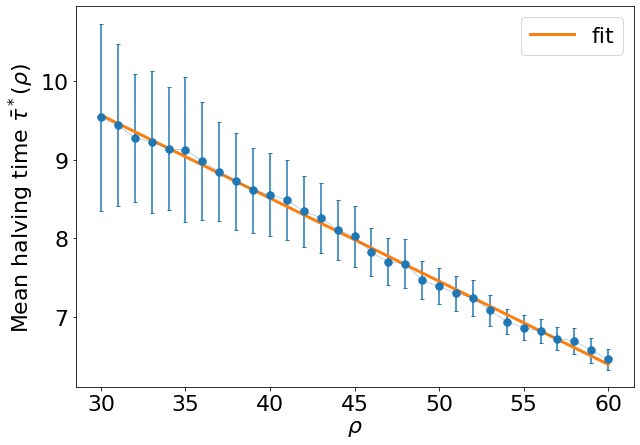

In [7]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update({'font.size': 22})
import numpy as np

soglia = 0.5

rv = range(30,61,1)
paths = [f'/scratch/scarpolini/databases/exit_time_{soglia:.2f}_lorenz_{r:.1f}.npy' for r in rv]
gen_path = '/scratch/scarpolini/databases/gen_exit_time_0.50_lorenz_54.0.npy'
et = [np.load(path) for path in paths]

labels = [str(r) for r in rv]
means = [np.mean(x) for x in [x[0] for x in et]]
stds = [np.std(x) for x in [x[0] for x in et]]

#gen = np.load('/scratch/scarpolini/databases/gen_exit_time_0.50_lorenz_54.0.npy')
#gen_mean, gen_std = np.mean(gen), np.std(gen)

plt.figure(figsize=(10,7))
l, caps, c = plt.errorbar(rv, means, stds, lw=0.3, marker='.', ms=15, elinewidth=1.5, uplims=True, lolims=True, capsize=2)
for cap in caps:
    cap.set_marker("_")

#l, caps, c = plt.errorbar([54.0], gen_mean, gen_std, lw=0.3, marker='.', ms=5, color='red', elinewidth=1, uplims=True, lolims=True, capsize=2, label='generated trajectories')
#for cap in caps:
#    cap.set_marker("_")    

plt.plot(rv, fit, alpha = 1, label='fit', lw=3)
plt.xlabel('$\\rho$')
plt.ylabel('Mean halving time $\\bar{\\tau}^*(\\rho)$')
#plt.title("Media e Varianza dell'exit time per ogni parametro rho")
plt.legend()
plt.savefig("plots/exit_time_medio.png", dpi=100, format='png')
plt.show()


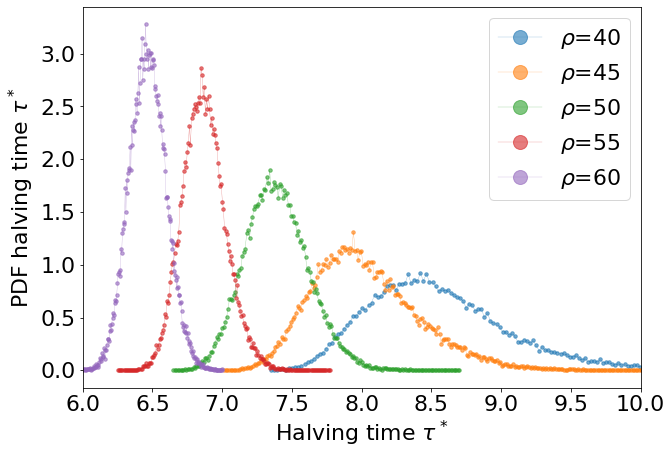

In [11]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update({'font.size': 22})
import numpy as np
soglia = 0.5

rv = range(40,65,5)
labels = ['$\\rho$='+str(r) for r in rv]
paths = [f'/scratch/scarpolini/databases/exit_time_{soglia:.2f}_lorenz_{r:.1f}.npy' for r in rv]
plt.figure(figsize=(10,7))
ii = 0
binsi=[1000,300,200,200, 200, 200 ,200]
for path, label in zip(paths, labels):
    hist, bin_edges = np.histogram(np.load(path)[0], bins=binsi[ii], density=True)
    for i in range(len(hist)):
        bin_edges[i] = (bin_edges[i]+bin_edges[i+1])/2.
    bin_edges = bin_edges[:-1]
    plt.plot(bin_edges, hist, label=label, alpha=0.6, marker='.', lw=0.3, ms=7)
    ii += 1
    
#plt.title('pdf exit time modello di lorenz a vari parametri rho')
plt.xlabel('Halving time $\\tau^*$')
plt.ylabel('PDF halving time $\\tau^*$')
#plt.yscale('log')
plt.legend(markerscale=4)
plt.xlim([6,10])
#plt.yscale('log')
plt.savefig("plots/pdf_exit_time.png", dpi=100, format='png')
plt.show()

## ora carico tutti gli exit time calcolati per un certo rho e faccio le previsioni in base al fit inverso

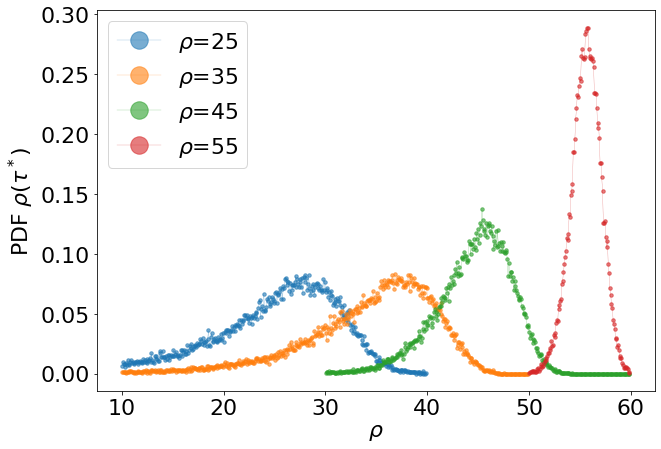

In [50]:
def inversa(y):
    return (1./-0.10552)*y - 12.73180/-0.10552

rv = [25,35,45,55]
plt.figure(figsize=(10,7))
labels = ['$\\rho$='+str(r) for r in rv]
ii = 0
binsi = [np.arange(a,b,0.08) for a,b in zip([10,10,30,50],[40,50,60,60])]
for r, label in zip(rv, labels):
    path = f'/scratch/scarpolini/databases/exit_time_{0.5:.2f}_lorenz_{r:.1f}.npy'
    et = np.load(path)
    previsione = inversa(et[0])
    hist, bin_edges = np.histogram(previsione, bins=binsi[ii], density=True)
    for i in range(len(hist)):
        bin_edges[i] = (bin_edges[i]+bin_edges[i+1])/2.
    bin_edges = bin_edges[:-1]
    plt.plot(bin_edges, hist, label=label, alpha=0.6, marker='.', lw=0.3, ms=7)
    ii += 1
    
    
plt.xlabel('$\\rho$')
plt.ylabel('PDF $\\rho(\\tau^*)$')
plt.legend(markerscale=5)
plt.savefig("plots/pdf_exit_time_predictions.png", dpi=100, format='png')
plt.show()

In [10]:
import numpy as np
gen = np.load('/scratch/scarpolini/lorenz_wgangp_new/runs/3/gen_trajs.npy').reshape(50000,2000)
et_gen = np.load('/scratch/scarpolini/databases/gen_exit_time_0.50_lorenz_54.0.npy').reshape(50000)
inv_et_gen = inversa(et_gen)

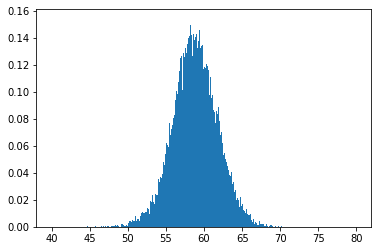

In [11]:
plt.hist(inv_et_gen, bins=np.arange(40,80,0.05), density=True)
plt.show()

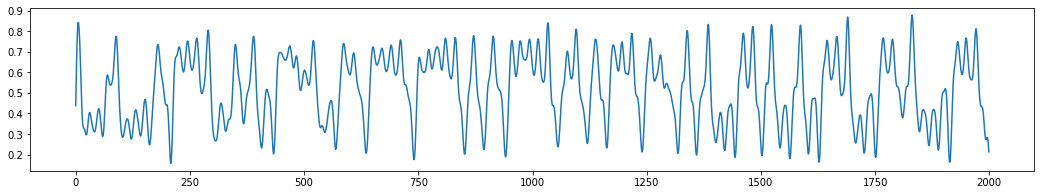

In [12]:
plt.figure(figsize=(18,3))
plt.plot(gen[34567,:])
plt.show()